# Playing with the visits table 

### Alex Lu | Spring Q 17-18  
---

5/30/2018

**OBJECTIVE**

---

I have been tasked with getting distributions of age, sex, for Arbor and PFC patients over the last year. This notebook examines the age and sex distributions from a visits paradigm (and not a unique'd patients paradigm). 

First, let's import all of the stuff that we'll need

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from utils.indicator import *
from utils.file_ops import *
from datetime import datetime
%matplotlib inline

We want to filter on the time of visit for longitudinal visualization. First, we should do a conversion on the format of the time string to make it more workable. Then, we're going to make this new 'ts' column the index, and drop the string form VisitDate series. 

In [11]:
def time_filter(t1, t2, df):
    # accepts numerical tuples of form (year, mon, day)
    print df.head(3)
    bound1 = datetime(*t1)
    bound2 = datetime(*t2)
    print bound1, bound2
    return df[bound1:bound2]

In [84]:
path_visits = "data/visits_with_gender.csv"
df_visits = pd.read_csv(path_visits, error_bad_lines=False, header=0)
df_visits.head()

,VisitId,LocationAbbreviation,PatientId,MRN,Age(Year),VisitType,DateFirstKnown,VisitDateTime,Sex
0,16605,PFC,5244,NaN,52,PFC FAST TRACK,3/12/2016 10:53:40 AM,6/3/2017 9:00:00 AM,U
1,16604,PFC,5619,NaN,37,PFC MENTAL HEALTH VISIT,9/10/2016 11:31:38 AM,6/3/2017 9:30:00 AM,F
2,16610,PFC,5982,NaN,54,PFC NEW PATIENT VISIT,6/3/2017 8:08:00 AM,6/3/2017 9:30:00 AM,F
3,16606,PFC,5983,NaN,66,PFC NEW PATIENT VISIT,6/3/2017 8:10:03 AM,6/3/2017 9:50:00 AM,F
4,16607,PFC,5984,NaN,48,PFC NEW PATIENT VISIT,6/3/2017 8:10:46 AM,6/3/2017 10:10:00 AM,F


In [85]:
df_visits['VisitDateTimeTS'] = pd.to_datetime((df_visits['VisitDateTime']))
df_visits['DateFirstKnownTS'] = pd.to_datetime((df_visits['DateFirstKnown']))
df_visits.index = df_visits['VisitDateTimeTS']
#df_visits = df_visits.iloc[::-1]
del df_visits['DateFirstKnown']
del df_visits['VisitDateTime']
del df_visits['MRN']

df_visits = df_visits[df_visits['LocationAbbreviation'] != 'TEST']
arbor_visits = df_visits[df_visits['LocationAbbreviation'] == 'AFC']
pfc_visits = df_visits[df_visits['LocationAbbreviation'] != 'AFC']



Let's take a look and make sure we're looking at the right stuff

In [86]:
df_visits['2017-7'].head(5)

,VisitId,LocationAbbreviation,PatientId,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,,
2017-07-01 08:50:00,16773,PFC,6035,77,PFC NEW PATIENT VISIT,F,2017-07-01 08:50:00,2017-07-01 08:19:47
2017-07-01 09:10:00,16772,PFC,6036,77,PFC NEW PATIENT VISIT,M,2017-07-01 09:10:00,2017-07-01 08:21:12
2017-07-01 09:10:00,16775,PFC,4329,57,PFC FOLLOW UP VISIT,F,2017-07-01 09:10:00,2014-12-20 08:09:08
2017-07-01 09:30:00,16774,PFC,5393,68,PFC NEW PATIENT VISIT,F,2017-07-01 09:30:00,2016-05-21 09:35:21
2017-07-01 09:50:00,16776,PFC,3570,44,PFC NEW PATIENT VISIT,M,2017-07-01 09:50:00,2014-03-15 08:00:10


In [87]:
arbor_visits.head(5)


,VisitId,LocationAbbreviation,PatientId,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,,
2017-06-04 09:30:00,16624,AFC,5988,78,ARBOR GENERAL VISIT,M,2017-06-04 09:30:00,2017-06-04 08:33:26
2017-06-04 09:45:00,16626,AFC,5989,75,ARBOR GENERAL VISIT,M,2017-06-04 09:45:00,2017-06-04 08:46:12
2017-06-04 10:00:00,16635,AFC,5990,30,ARBOR GENERAL VISIT,F,2017-06-04 10:00:00,2017-06-04 09:44:53
2017-06-04 10:11:34,16623,AFC,5145,58,MISC NOTE,F,2017-06-04 10:11:34,2016-01-17 08:41:10
2017-06-04 10:15:00,16640,AFC,5992,41,ARBOR GENERAL VISIT,F,2017-06-04 10:15:00,2017-06-04 11:10:08


In [88]:
pfc_visits.head(5)

,VisitId,LocationAbbreviation,PatientId,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,,
2017-06-03 09:00:00,16605,PFC,5244,52,PFC FAST TRACK,U,2017-06-03 09:00:00,2016-03-12 10:53:40
2017-06-03 09:30:00,16604,PFC,5619,37,PFC MENTAL HEALTH VISIT,F,2017-06-03 09:30:00,2016-09-10 11:31:38
2017-06-03 09:30:00,16610,PFC,5982,54,PFC NEW PATIENT VISIT,F,2017-06-03 09:30:00,2017-06-03 08:08:00
2017-06-03 09:50:00,16606,PFC,5983,66,PFC NEW PATIENT VISIT,F,2017-06-03 09:50:00,2017-06-03 08:10:03
2017-06-03 10:10:00,16607,PFC,5984,48,PFC NEW PATIENT VISIT,F,2017-06-03 10:10:00,2017-06-03 08:10:46


In [89]:
def temporal_distribution(df, ts_name = 'ts'):
    '''

    '''
    time_gb = df.groupby(df[ts_name].dt.month)
    plt.figure()
    time_gb.plot()
    plt.show()


In [90]:
arbor_visits['Sex'].value_counts(normalize=True)

F    0.504323
M    0.387128
U    0.108549
Name: Sex, dtype: float64

In [91]:
pfc_visits['Sex'].value_counts(normalize=True)

F    0.544834
M    0.408382
U    0.046784
Name: Sex, dtype: float64

In [92]:
arbor_visits['Age(Year)'].value_counts(bins=10)

(60.2, 68.8]     204
(51.6, 60.2]     159
(34.4, 43.0]     157
(25.8, 34.4]     134
(43.0, 51.6]     127
(68.8, 77.4]     112
(17.2, 25.8]     108
(77.4, 86.0]      35
(-0.087, 8.6]      5
(8.6, 17.2]        0
Name: Age(Year), dtype: int64

In [93]:
pfc_visits['Age(Year)'].value_counts(bins=10)

(62.5, 71.0]     199
(54.0, 62.5]     196
(45.5, 54.0]     196
(37.0, 45.5]     114
(28.5, 37.0]     111
(20.0, 28.5]      87
(71.0, 79.5]      59
(79.5, 88.0]      46
(11.5, 20.0]      14
(2.914, 11.5]      4
Name: Age(Year), dtype: int64

In [94]:
pfc_visits[pfc_visits['Age(Year)'] < 18]

,VisitId,LocationAbbreviation,PatientId,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,,
2017-07-25 22:32:50,16977,REMOTE-PFC,3824,3,BRIDGE TO CARE NOTE,U,2017-07-25 22:32:50,2014-06-29 11:51:57
2017-08-19 09:33:20,17119,PFC,3999,3,MISC NOTE,F,2017-08-19 09:33:20,2014-08-24 19:51:32
2018-05-19 12:31:44,18659,REMOTE-PFC,3824,3,PFC FAST TRACK VACCINE,U,2018-05-19 12:31:44,2014-06-29 11:51:57
2018-05-23 09:30:00,18692,PFC,3824,3,PFC NEW PATIENT VISIT,U,2018-05-23 09:30:00,2014-06-29 11:51:57


In [95]:
arbor_visits_clean = arbor_visits[arbor_visits['Age(Year)'] > 18]
pfc_visits_clean = pfc_visits[pfc_visits['Age(Year)'] > 18]

In [96]:
arbor_visits_clean['Sex'].value_counts(normalize=True)

F    0.500000
M    0.391262
U    0.108738
Name: Sex, dtype: float64

In [97]:
pfc_visits_clean['Sex'].value_counts(normalize=True)

F    0.545544
M    0.410382
U    0.044074
Name: Sex, dtype: float64

In [107]:
arbor_visits_clean['Age(Year)'].value_counts(sort=False,bins=10)

(18.932, 25.7]    102
(25.7, 32.4]      110
(32.4, 39.1]      118
(39.1, 45.8]       90
(45.8, 52.5]      112
(52.5, 59.2]      125
(59.2, 65.9]      153
(65.9, 72.6]      128
(72.6, 79.3]       76
(79.3, 86.0]       16
Name: Age(Year), dtype: int64

In [108]:
pfc_visits_clean['Age(Year)'].value_counts(sort=False,bins=10)

(18.93, 25.9]     61
(25.9, 32.8]      89
(32.8, 39.7]      81
(39.7, 46.6]     110
(46.6, 53.5]     128
(53.5, 60.4]     185
(60.4, 67.3]     206
(67.3, 74.2]      79
(74.2, 81.1]      47
(81.1, 88.0]      35
Name: Age(Year), dtype: int64

In [98]:
arbor_visits_clean.describe()

,VisitId,PatientId,Age(Year)
count,1030.000000,1030.000000,1030.000000
mean,17697.190291,5815.876699,50.040777
std,640.074547,1159.517135,17.046278
min,16623.000000,259.000000,19.000000
25%,17145.250000,5990.000000,36.000000
50%,17711.500000,6161.000000,51.000000
75%,18251.750000,6373.000000,65.000000
max,18760.000000,6603.000000,86.000000


In [99]:
pfc_visits_clean.describe()

,VisitId,PatientId,Age(Year)
count,1021.000000,1021.000000,1021.000000
mean,17661.382958,5746.238002,52.674829
std,613.387081,1262.416677,16.036113
min,16603.000000,102.000000,19.000000
25%,17130.000000,5976.000000,41.000000
50%,17649.000000,6158.000000,54.000000
75%,18193.000000,6348.000000,64.000000
max,18719.000000,6592.000000,88.000000


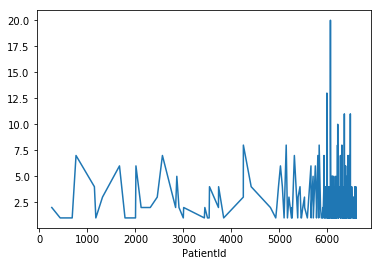

In [119]:
arbor_visits_clean.groupby(arbor_visits_clean['PatientId']).size().plot()

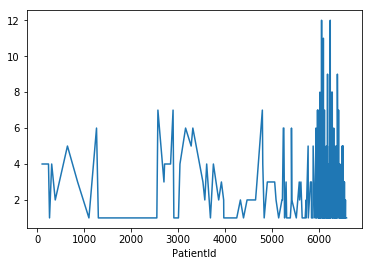

In [120]:
pfc_visits_clean.groupby(pfc_visits_clean['PatientId']).size().plot()